In [1]:
from IPython.display import IFrame

In [6]:
powerBiEmbed = "https://app.powerbi.com/reportEmbed?reportId=fc398e63-0887-4bd5-900e-ab26c3ebccce&autoAuth=true&ctid=674e0aa3-b22e-4908-83aa-6f3ee1cb39c8"

IFrame(powerBiEmbed, width =1000 , height = 500)
    

<a id="1"></a>
# <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> OYMPICS ANALYSIS EDA & POWER BI </p>


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:BLACK;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:50px 100px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. ABOUT DATASET](#2)
    
* [3. DATA SUMMARY](#3)
    
* [4. EXPLORATORY DATA ANALYSIS](#4)
    


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



<a id="2"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ABOUT DATASET</p>

# 1. Data Importing

In [3]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

# 2. Collecting information about the two dataset

We are going to:

1. Review the first lines of the data;
2. Use the describe and info functions to collect statistical information, datatypes, column names and other information.

In [4]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DATA SUMMARY</p>

# 3. Joining the dataframes

#### We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function 

In [8]:
merged = pd.merge(data, regions, on='NOC', how='left')

Let's see the result:

In [9]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS</p>

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 40px;overflow:hidden;font-weight:500">1. Distribution of the age of gold medalists</p>

Let's start creating a new dataframe including only gold medalists.

In [10]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


I would like to have a plot of the Age to see the distribution but I need to check first if the Age column contains NaN values..

In [11]:
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

..and it does.

Let's take only the values that are different from NaN.

In [12]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

We can now create a countplot to see the result of our work:

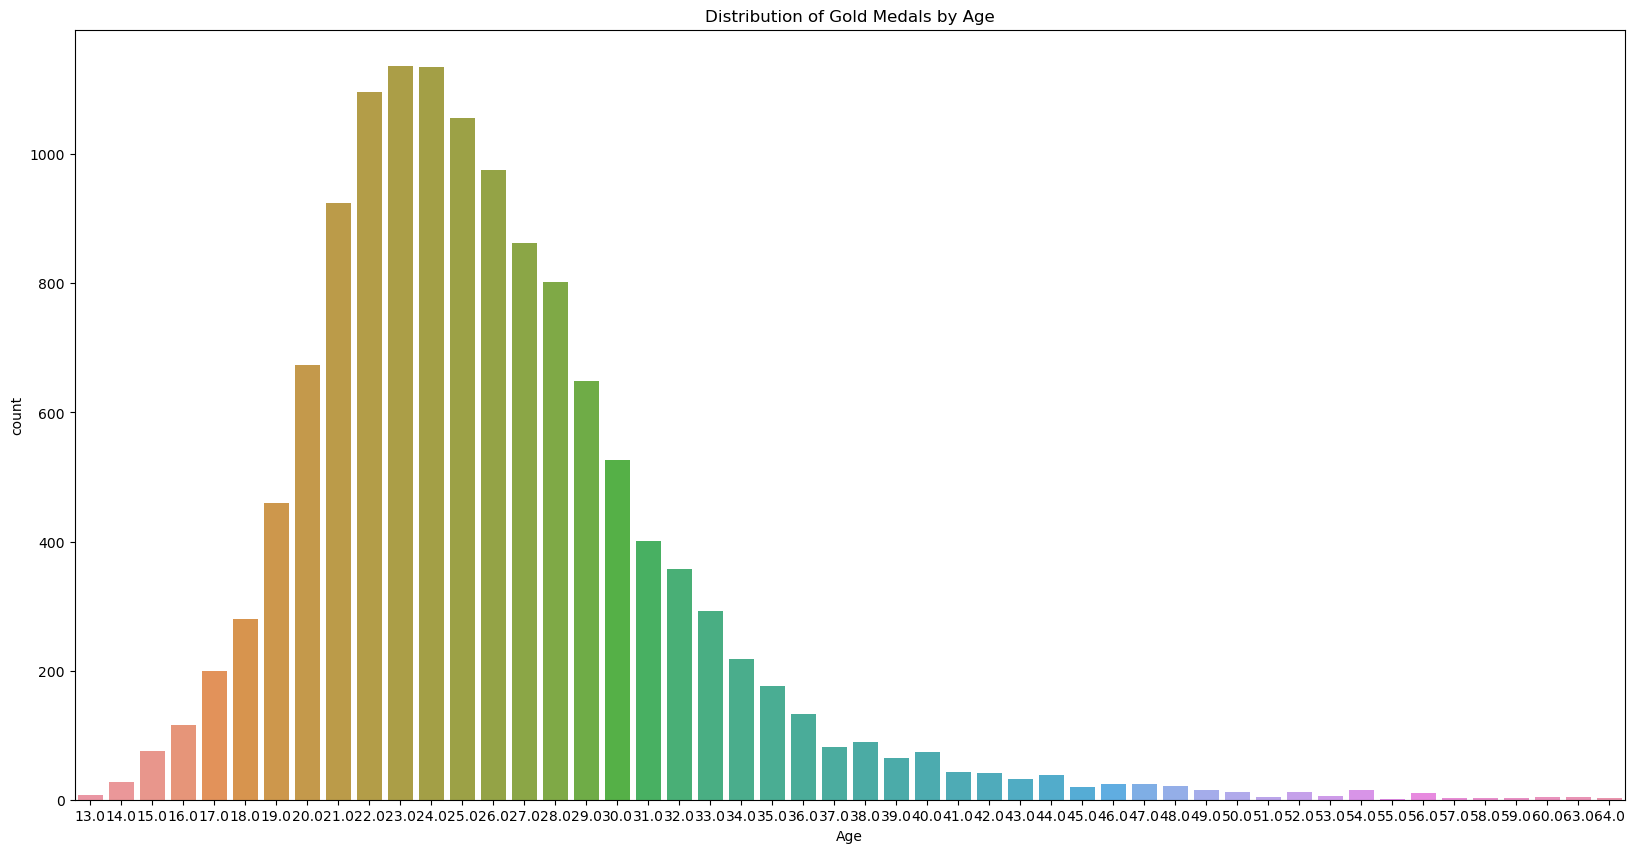

In [27]:


plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(data=goldMedals, x='Age')
plt.title('Distribution of Gold Medals by Age')
plt.show()


It seems that we have people with Age greater that 50 with a gold medal: Let's know more about those people!

In [13]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 40px;overflow:hidden;font-weight:500">2. Women in Athletics</p>

Studying the data we can try to understand how much medals we have only for women in the recent history of the Summer Games.

![Credits to the Daily Mail for the picture](https://i.dailymail.co.uk/i/pix/2012/08/13/article-2187749-147C70BD000005DC-253_964x608.jpg)

Let's create a filtered datased:

In [14]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Done. Let's now review our work:

In [15]:
womenInOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NaN
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN
136,49,Moonika Aava,F,28.0,168.0,65.0,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN


To plot the curve over time, let's create a plot in which we put the year (on the x-axis) and count of the number of medals per edition of the games (consider that we will have more medals for the same athlete).

Text(0.5, 1.0, 'Women medals per edition of the Games')

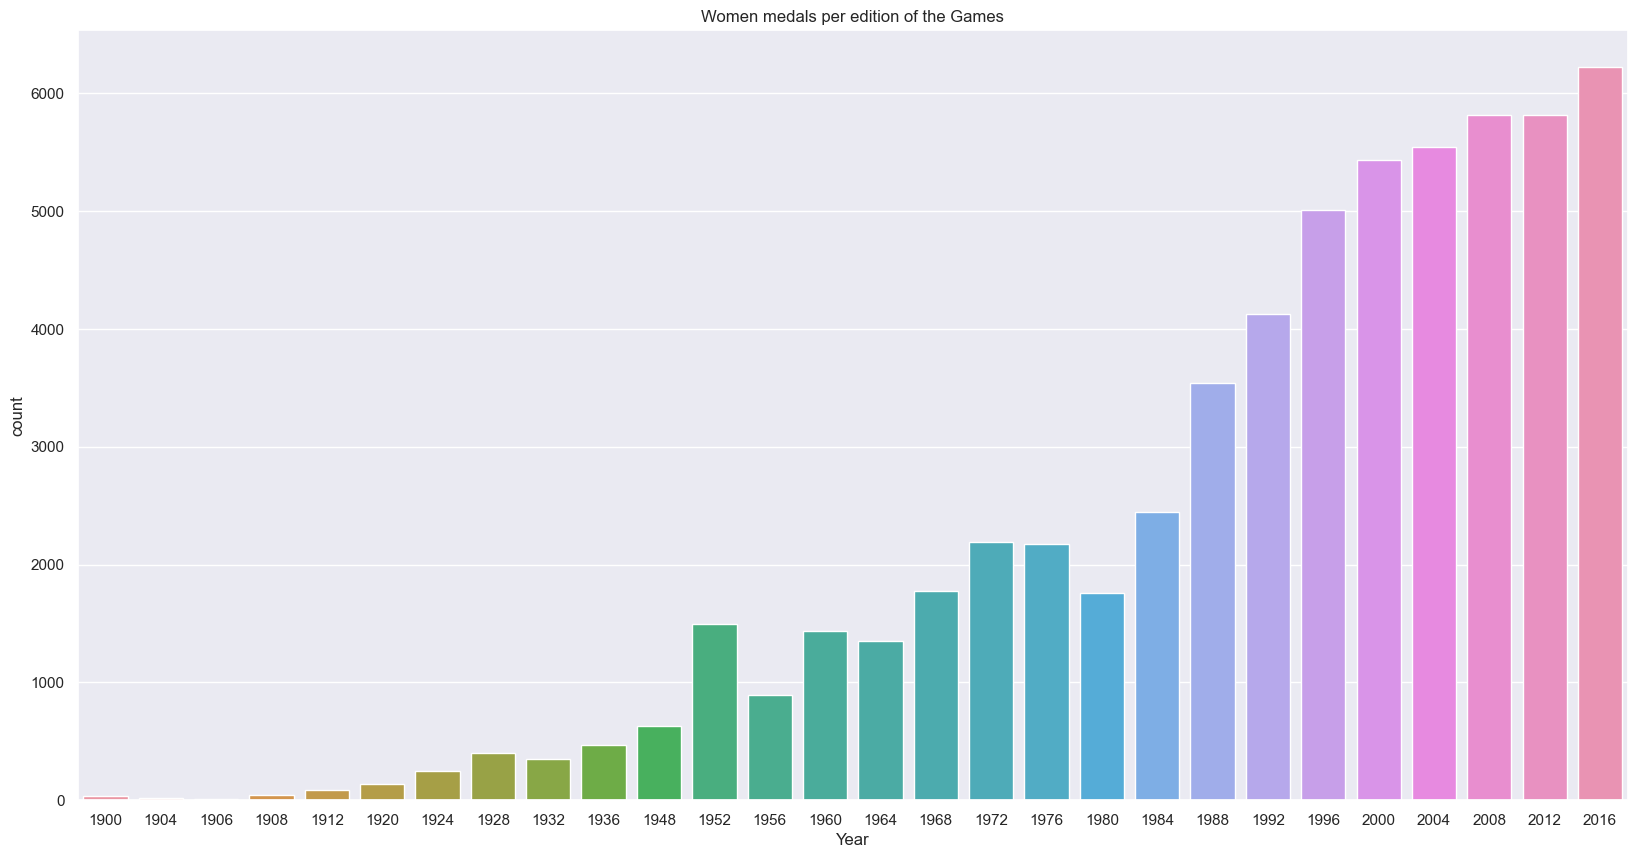

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

In [17]:
womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN,Switzerland,NaN
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,NaN
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,NaN
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN,France,NaN


In [18]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

33

So we have 33 records (with repetitions, for example 'Marion Jones (-Farquhar)' won a medal both for Tennis Women's Singles and Tennis Mixed Doubles - To be sure I cross-checked also with [Wikipedia](https://en.wikipedia.org/wiki/Marion_Jones_Farquhar) and the outcome seems correct).

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 40px;overflow:hidden;font-weight:500">3. Medals per country</p>

Let's now review the top 5 gold medal countries:

In [19]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Let's plot this:

Text(0.5, 1.0, 'Medals per Country')

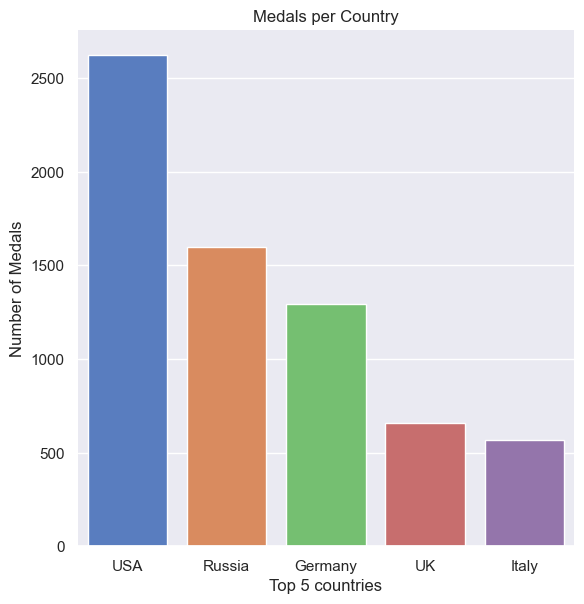

In [20]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

The USA seems to be the most winning country.

But which are the most awarded disciplines of American Athletes?

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 40px;overflow:hidden;font-weight:500">4. Disciplines with the greatest number of Gold Medals </p>

Let's create a dataframe to filter the gold medals only for the USA.

In [22]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

Done! Now, we can count the medals per discipline:

In [23]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


But hey, wait a minute: We are reviewing a list of athletes, but maybe we are counting the medal of each member of the team instead of counting the medals per team.

Let's slice the dataframe using only the data of male athletes to better review it:

In [24]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Sex'] == 'M')].sort_values(['Year'])

In [25]:
basketballGoldUSA.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
71407,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
195790,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
213368,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
219204,110112,Carl Leslie Shy,M,27.0,183.0,77.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
22390,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


What we supposed is true: the medals are not grouped by Edition/Team but we were counting the gold medals of each member of the team!

Let's proceed grouping by year the athletes - the idea is to create a new dataframe to make a pre-filter using only the first record for each member of the team.

In [26]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1936,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,None
1948,101443,"Robert Lloyd Jackson ""Jack"" Robinson",M,21.0,183.0,82.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,None
1952,58738,"Robert Earl ""Bob"" Kenney",M,21.0,188.0,84.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,None
1956,128271,"James Patrick ""Jim"" Walsh",M,26.0,193.0,86.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,None
1960,13371,"Robert Lewis ""Bob"" Boozer",M,23.0,203.0,99.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,None
1964,130843,"George ""Jiff"" Wilson",M,22.0,203.0,95.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA,None
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA,None
1976,65853,"Thomas Joseph ""Tom"" LaGarde",M,21.0,208.0,97.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA,None
1984,120501,Wayman Lawrence Tisdale,M,20.0,205.0,118.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,None


Let's count the records obtained:

In [27]:
groupedBasketUSA['ID'].count()

15

And so we have 15 records - cross-checking with the [related Wikipedia page](https://en.wikipedia.org/wiki/United_States_men%27s_national_basketball_team) it seems that our filtering operation has obtained the desired result!

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 40px;overflow:hidden;font-weight:500">5 .What is the median height/weight of an Olympic medalist?</p>

Let's try to plot a scatterplot of height vs weight to see the distribution of values (without grouping by discipline).

First of all, we have to take again the goldMedals dataframe

In [28]:
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


We can see that we have NaN values both in height and weight columns.

At this point, we can act as follows:

1. Using only the rows that has a value in the Height and Weight columns;
2. Replace the value with the mean of the column.

Solution 2 in my opinion it is not the best way to go: we are talking about data of athletes of different ages and different disciplines (that have done different training).

Let's go with solution 1.

The first thing to do is to collect general information about the dataframe that we have to use: goldMedals.

In [29]:
goldMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13224 entries, 3 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      13224 non-null  int64  
 1   Name    13224 non-null  object 
 2   Sex     13224 non-null  object 
 3   Age     13224 non-null  float64
 4   Height  10532 non-null  float64
 5   Weight  10248 non-null  float64
 6   Team    13224 non-null  object 
 7   NOC     13224 non-null  object 
 8   Games   13224 non-null  object 
 9   Year    13224 non-null  int64  
 10  Season  13224 non-null  object 
 11  City    13224 non-null  object 
 12  Sport   13224 non-null  object 
 13  Event   13224 non-null  object 
 14  Medal   13224 non-null  object 
 15  region  13223 non-null  object 
 16  notes   171 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


Okay, we have more than 13.000 rows.

We will now create a dataframe filtering only the rows that has the column Height and Weight populated.

In [30]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

Okay, let's see the first rows of the dataset and the new information with the info function.

In [31]:
notNullMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [32]:
notNullMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 42 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10167 non-null  int64  
 1   Name    10167 non-null  object 
 2   Sex     10167 non-null  object 
 3   Age     10167 non-null  float64
 4   Height  10167 non-null  float64
 5   Weight  10167 non-null  float64
 6   Team    10167 non-null  object 
 7   NOC     10167 non-null  object 
 8   Games   10167 non-null  object 
 9   Year    10167 non-null  int64  
 10  Season  10167 non-null  object 
 11  City    10167 non-null  object 
 12  Sport   10167 non-null  object 
 13  Event   10167 non-null  object 
 14  Medal   10167 non-null  object 
 15  region  10166 non-null  object 
 16  notes   143 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 1.4+ MB


Okay, we have 10.000 rows now, let's create the scatterplot:

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

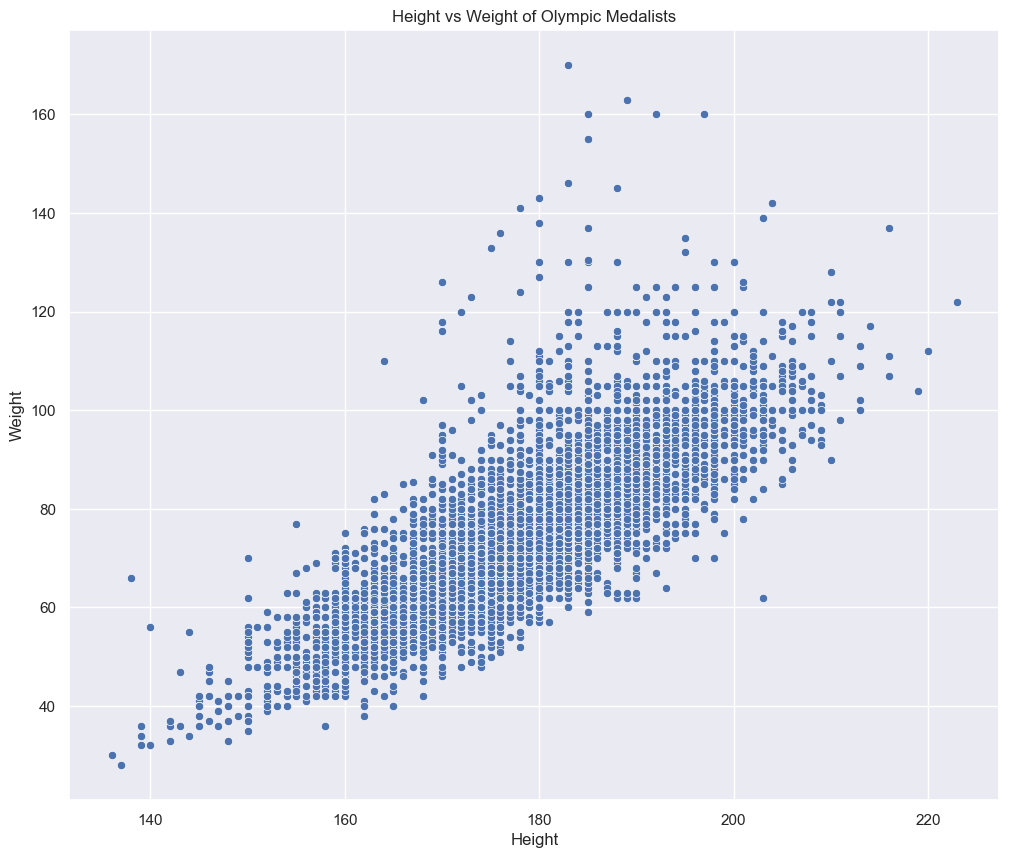

In [33]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

The vast majority of the samples show a linear relation between height and weight (the more the weight, the more the height).

We have exceptions and I am willing to know more!

For example, let's see which is the athlete that weighs more than 160 kilograms

In [34]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


Weighlifters: that makes sense :)

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 40px;overflow:hidden;font-weight:500">6.Evolution of the Olympics over time </p>



We will now try to answer the following questions:

* How the number of athletes/countries varied along time ?
* How the proportion of Men/Women varied with time ?
* How about mean age, weight and height along time ?

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 8px 30px;overflow:hidden;font-weight:500">6.1 Variation of Male/ Female Athletes over time </p>

We will now create two dataframes dividing the population of our dataset using Sex and Season (we would like to review only the summer games)

In [35]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Done, let's check the head of one of the new dataframes to see the result:

In [36]:
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Okay, at this time we are ready to create the plots.

The first one is for men, the second for women:

Text(0.5, 1.0, 'Variation of Male Athletes over time')

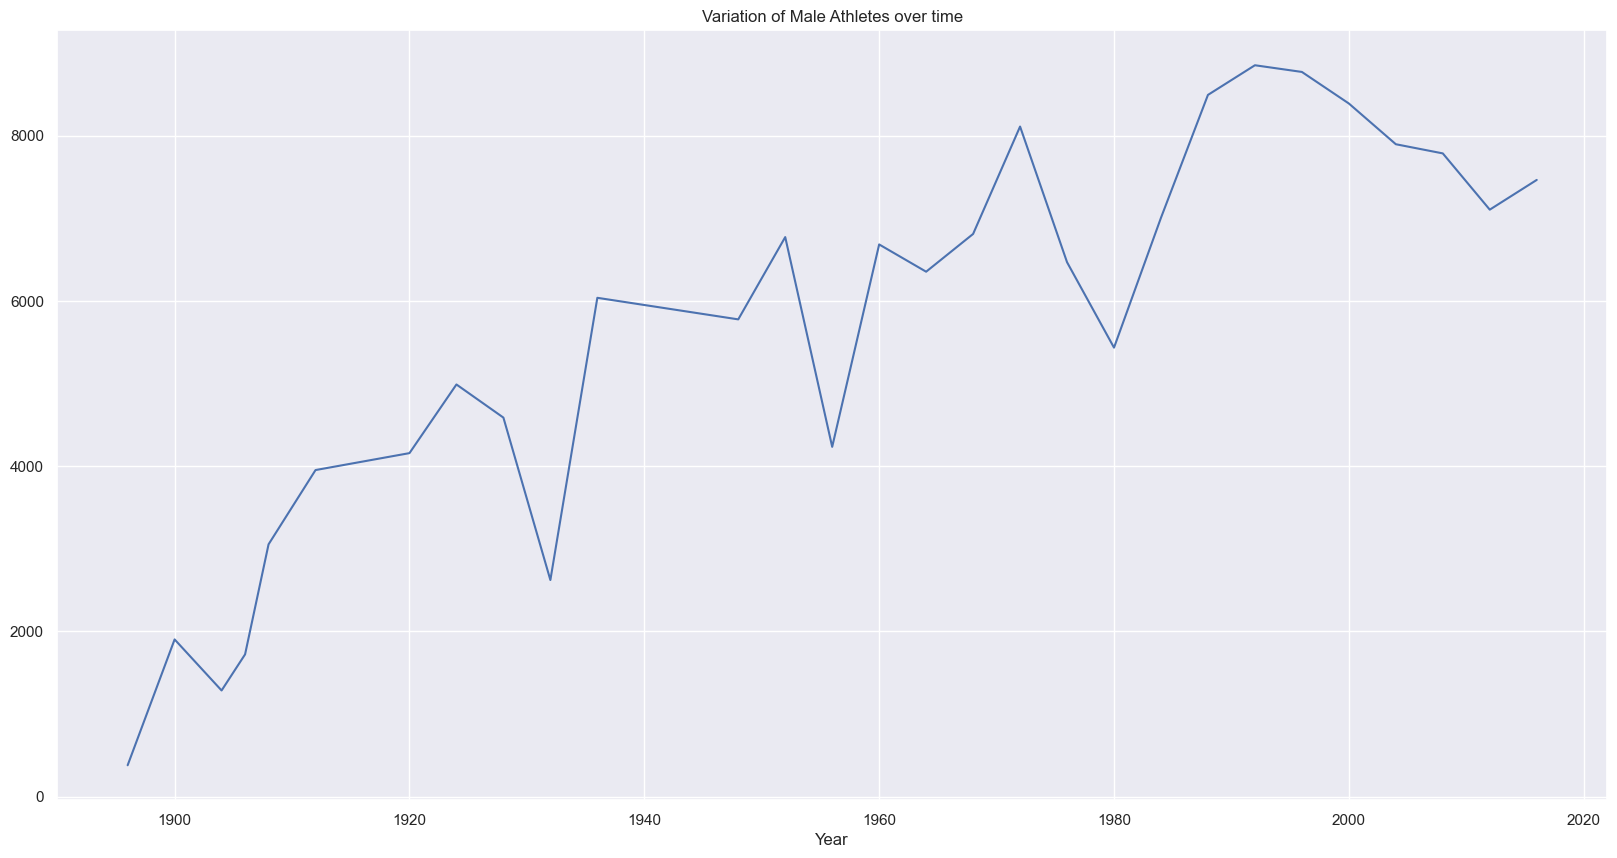

In [37]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

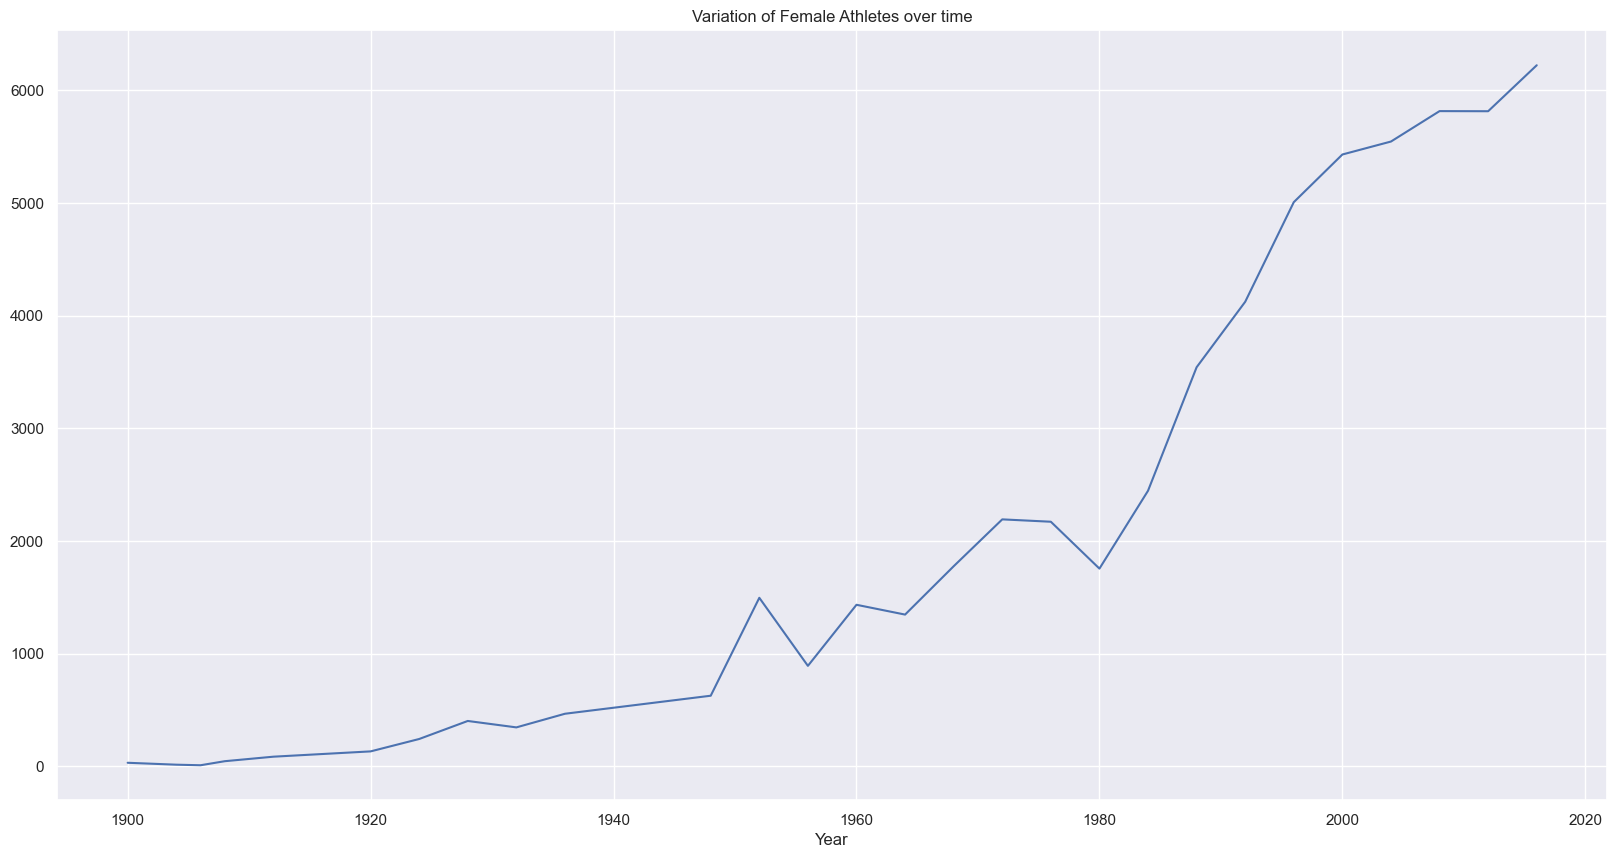

In [38]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

What I immediately saw is that for women:

1. We have a steep increase in the population;
2. The grow is constant.

On the other hand, the grow for men seems less strong:

1. After the 1990 we can see a relevant decrease in the number of male athletes at the summer games;
2. The growth has slowly restarted recently.

*** 6.2 Variation of age along time ***

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 8px 30px;overflow:hidden;font-weight:500"> 6.2 Variation of age along time </p>

Another really interesting question can be: *"How the age of the athletes has changed over time?"*

Let's use a [box plot](https://en.wikipedia.org/wiki/Box_plot): In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. 

Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. 

The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers. 

In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean. 

Box plots can be drawn either horizontally or vertically. Box plots received their name from the box in the middle. 

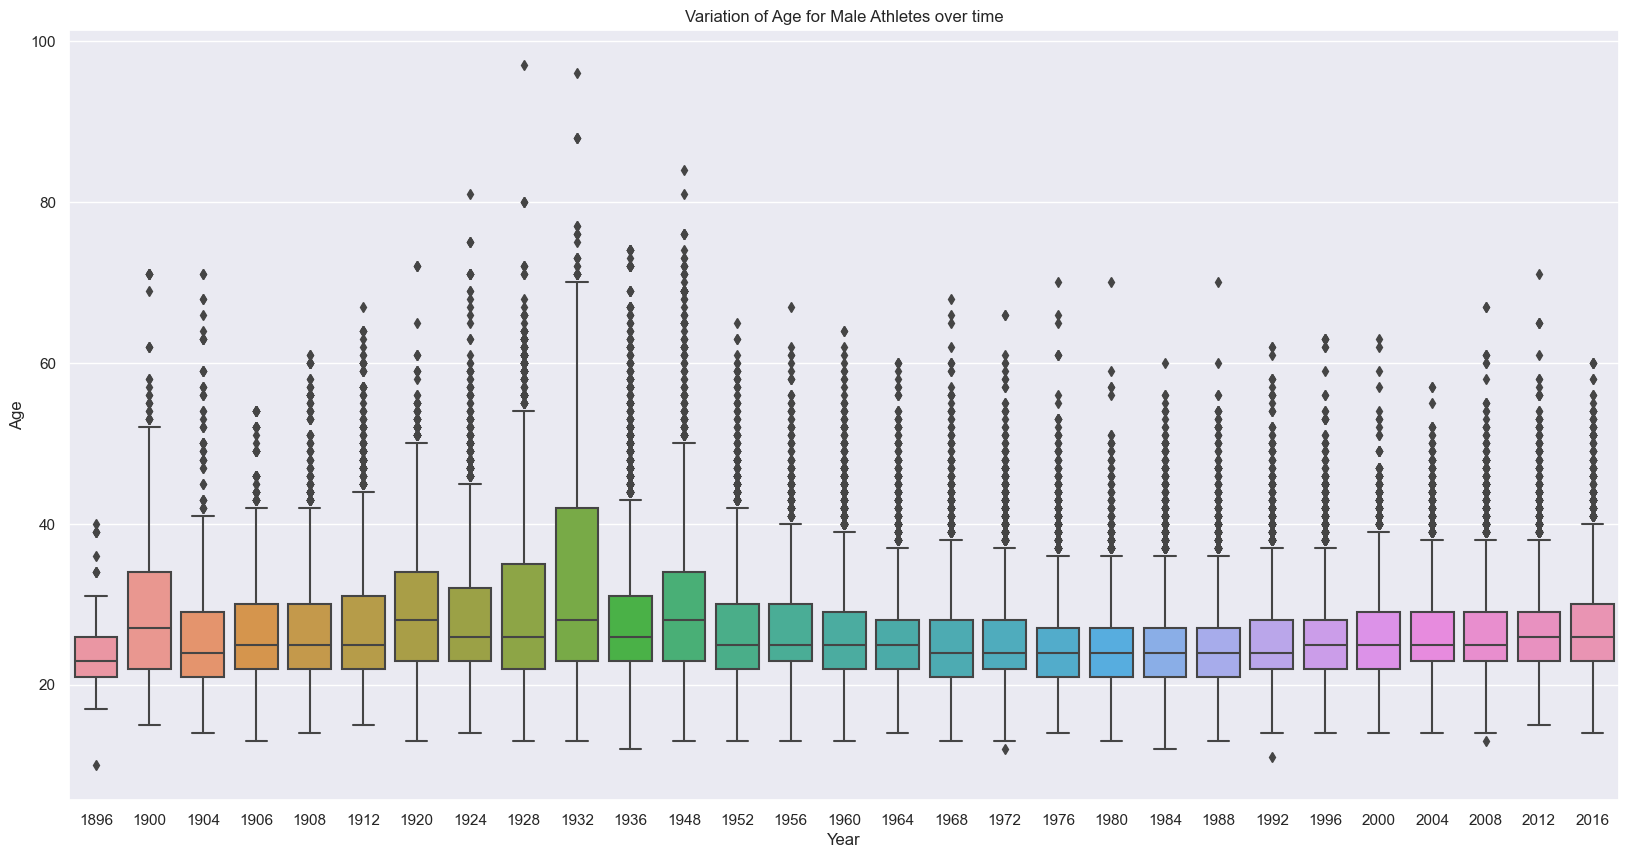

In [44]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')
plt.show()

What is strange for me is the age of some athletes in the games between the 1924 and the 1948: let's check all the people with age greater than 80.

In [45]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


To be honest, I did not know that the Olympics included Art Competitions!

After a brief research, [I discovered more](https://en.wikipedia.org/wiki/Art_competitions_at_the_Summer_Olympics): Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948. The competitions were part of the original intention of the Olympic Movement's founder, Pierre de Frédy, Baron de Coubertin. Medals were awarded for works of art inspired by sport, divided into five categories: architecture, literature, music, painting, and sculpture. 

Okay, after this brief parenthesis we can do the same graph for women:

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

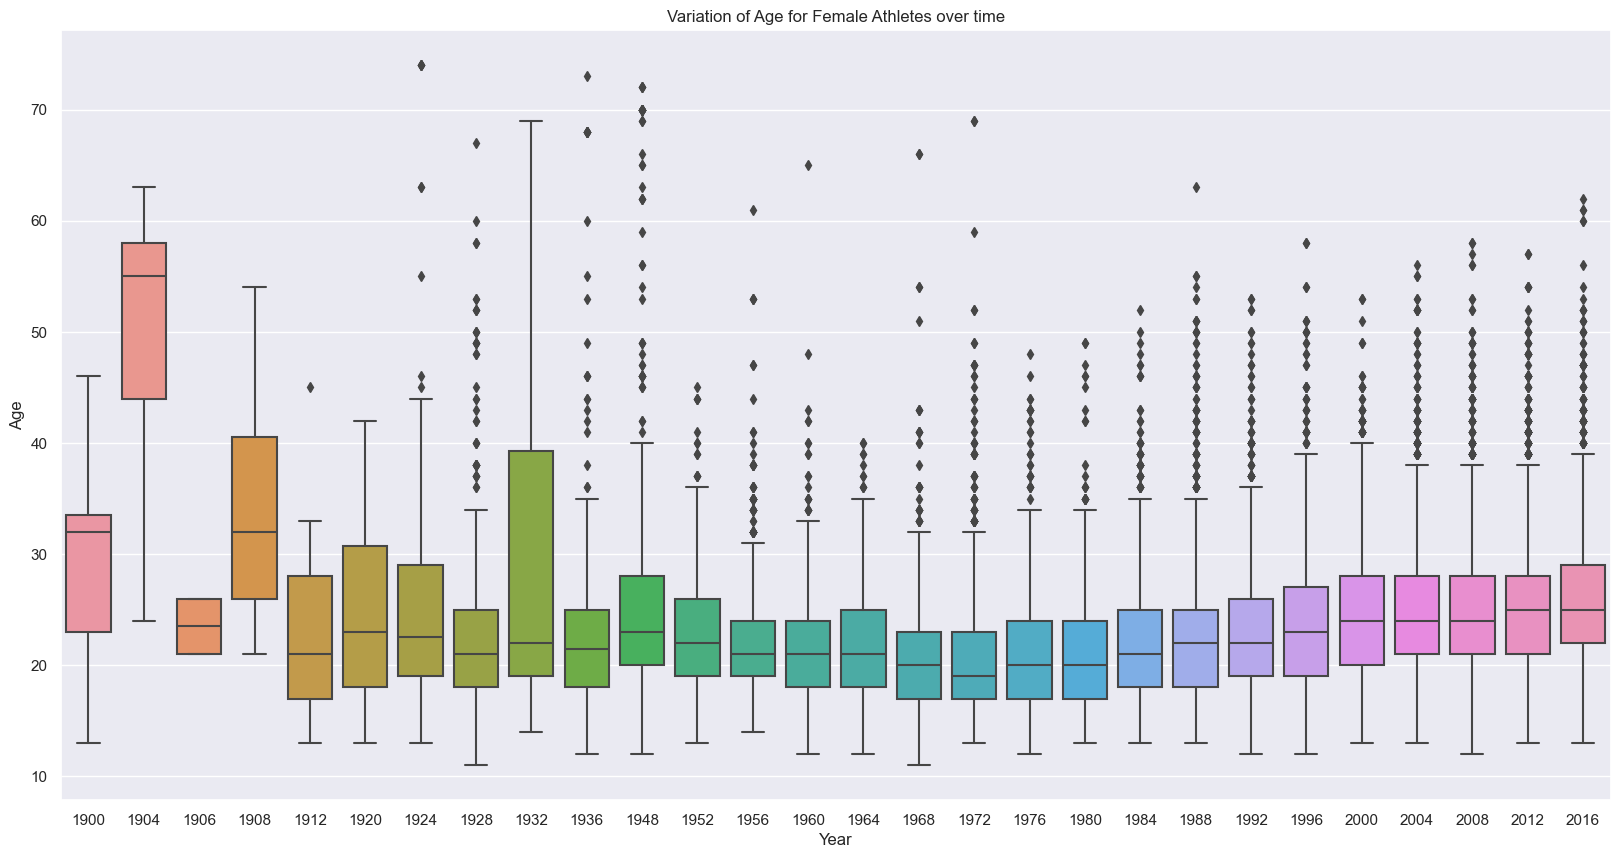

In [46]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Year', y ='Age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

Interesting points for me:

* Generally, the age distribution starts has a lower minimum and a lower maximum;
* In 1904 the age distribution is strongly different from the other Olympics: let's know more about this point:

In [47]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


***10.3 Variation of weight along time ***

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 8px 30px;overflow:hidden;font-weight:500"> 6.3 Variation of weight along time </p>

We will now try using a pointplot to visualize the variation in weight over athletes.

The first graph will show data for men, the second for women:

Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time')

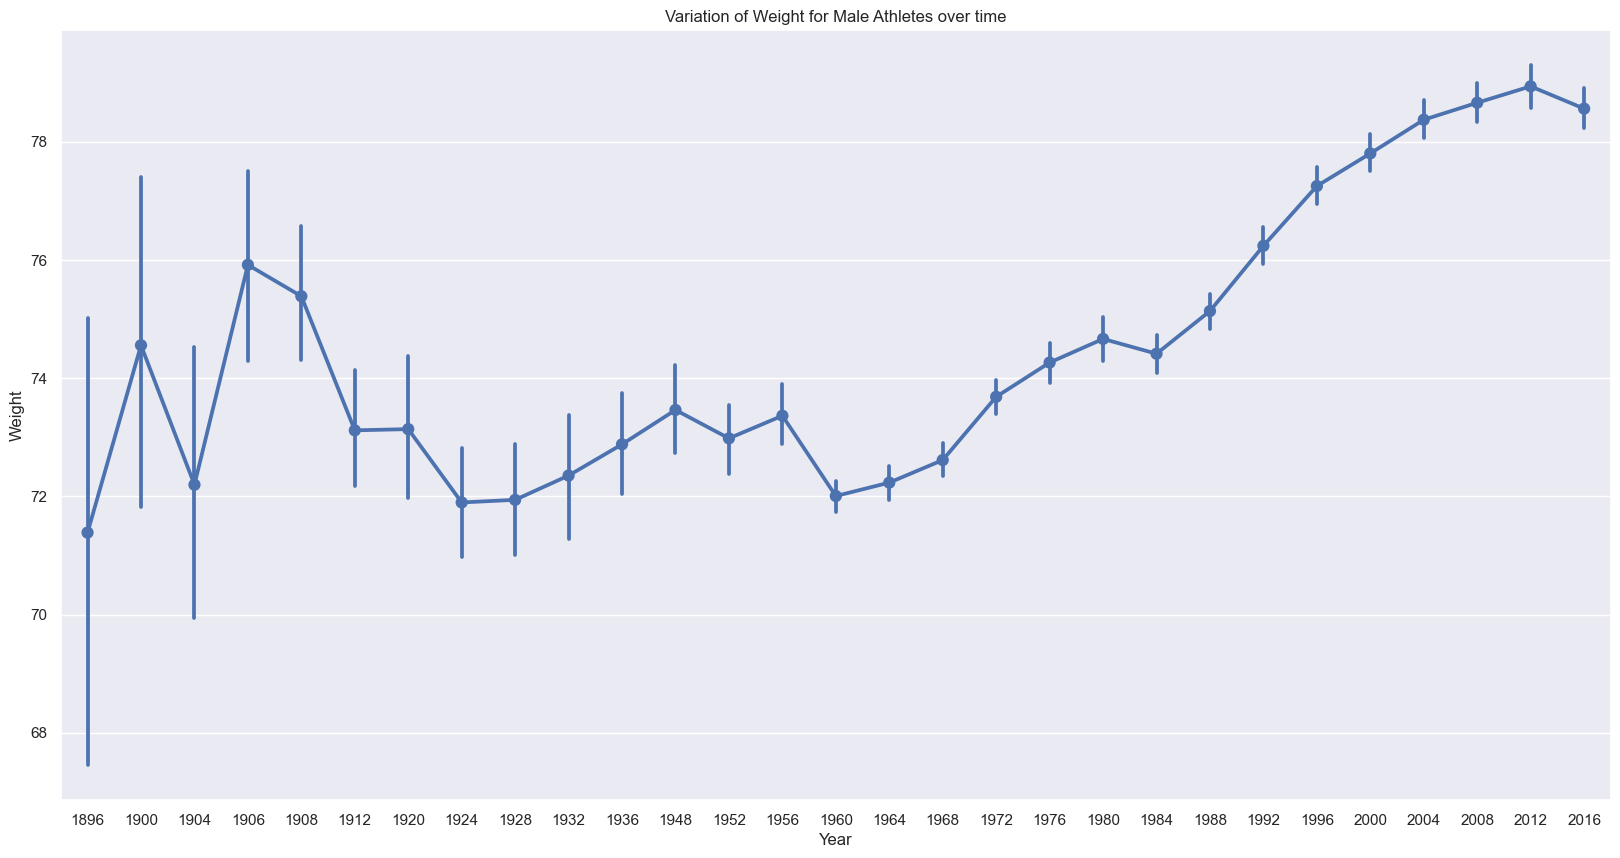

In [48]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year',y =  'Weight', data=MenOverTime)
plt.title('Variation of Weight for Male Athletes over time')

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean o

Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time')

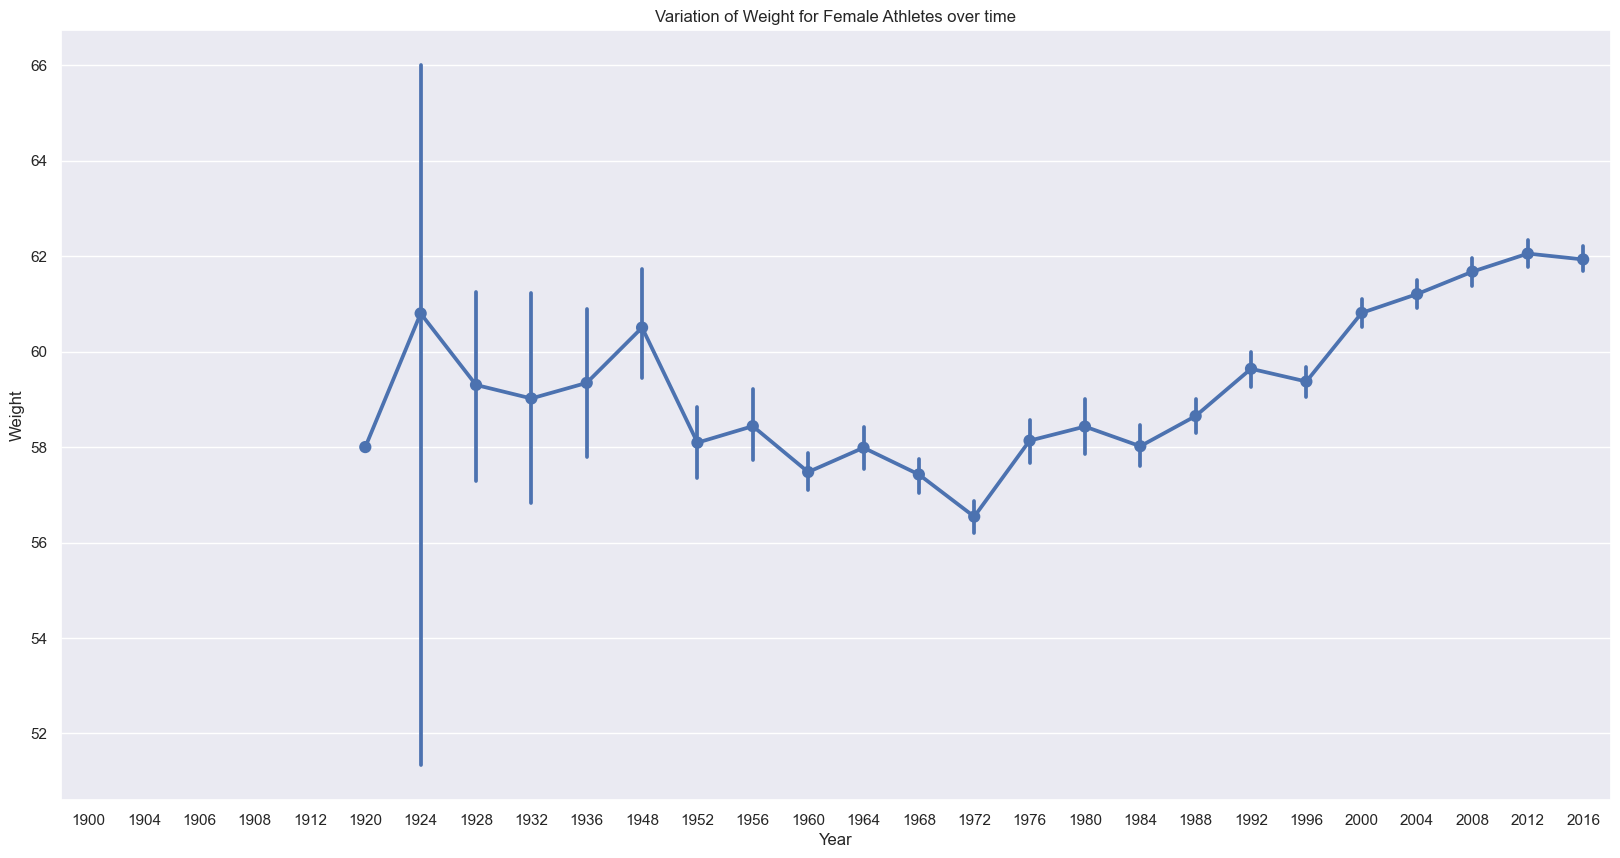

In [49]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year',y =  'Weight', data=WomenOverTime)
plt.title('Variation of Weight for Female Athletes over time')

What we can see is that it seems that we do not have data for women before 1924.

Let's try filtering all the women athletes for that period to review this point:

In [50]:
womenInOlympics.loc[womenInOlympics['Year'] < 1924].head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN
1768,978,Mrta Elvira Adlerz (-Hermansson),F,15.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Women's Plain High,NaN,Sweden,NaN
1769,978,Mrta Elvira Adlerz (-Hermansson),F,23.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,NaN,Sweden,NaN
2749,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain-1,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Mixed Doubles, Covered Courts",Silver,UK,NaN
2750,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Women's Singles, Covered Courts",NaN,UK,NaN
4963,2830,Mary Aileen Allen (Conquest-),F,31.0,157.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,NaN,USA,NaN




Okay, the first values seems all NaN (Not a number) so the information is correct.

***10.4 Variation of height along time***

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 8px 30px;overflow:hidden;font-weight:500"> 6.4 Variation of height along time  </p>

Using the same pointplot (with a different palette) we can plot the weight change along time.

The first graph will show the information for men, the second for women:

Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

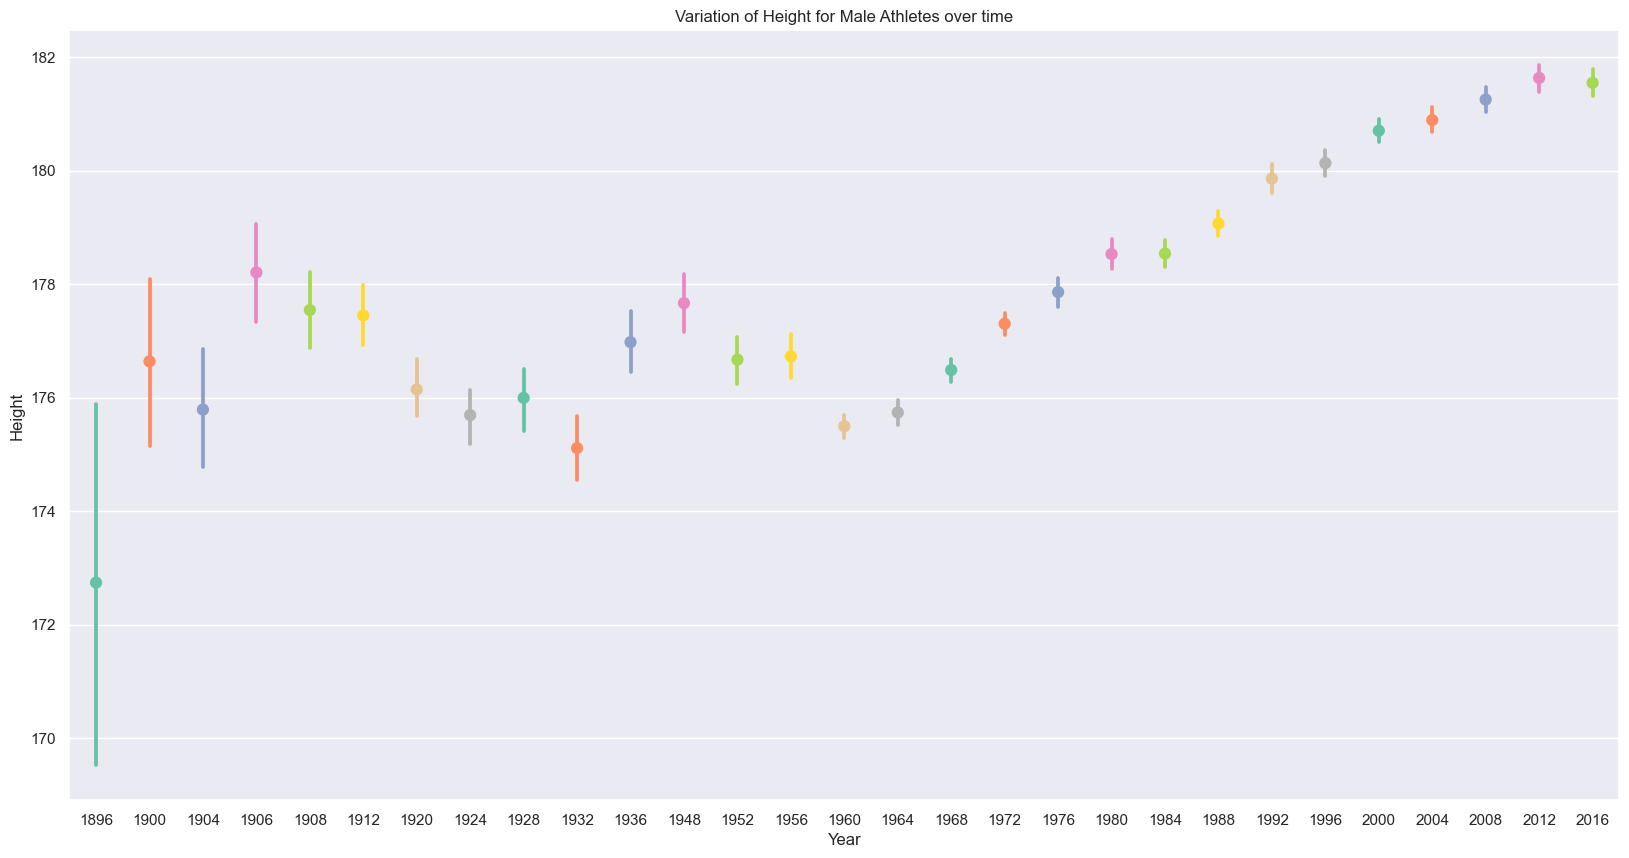

In [51]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year', y ='Height', data=MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean o

Text(0.5, 1.0, 'Variation of Height for Female Athletes over time')

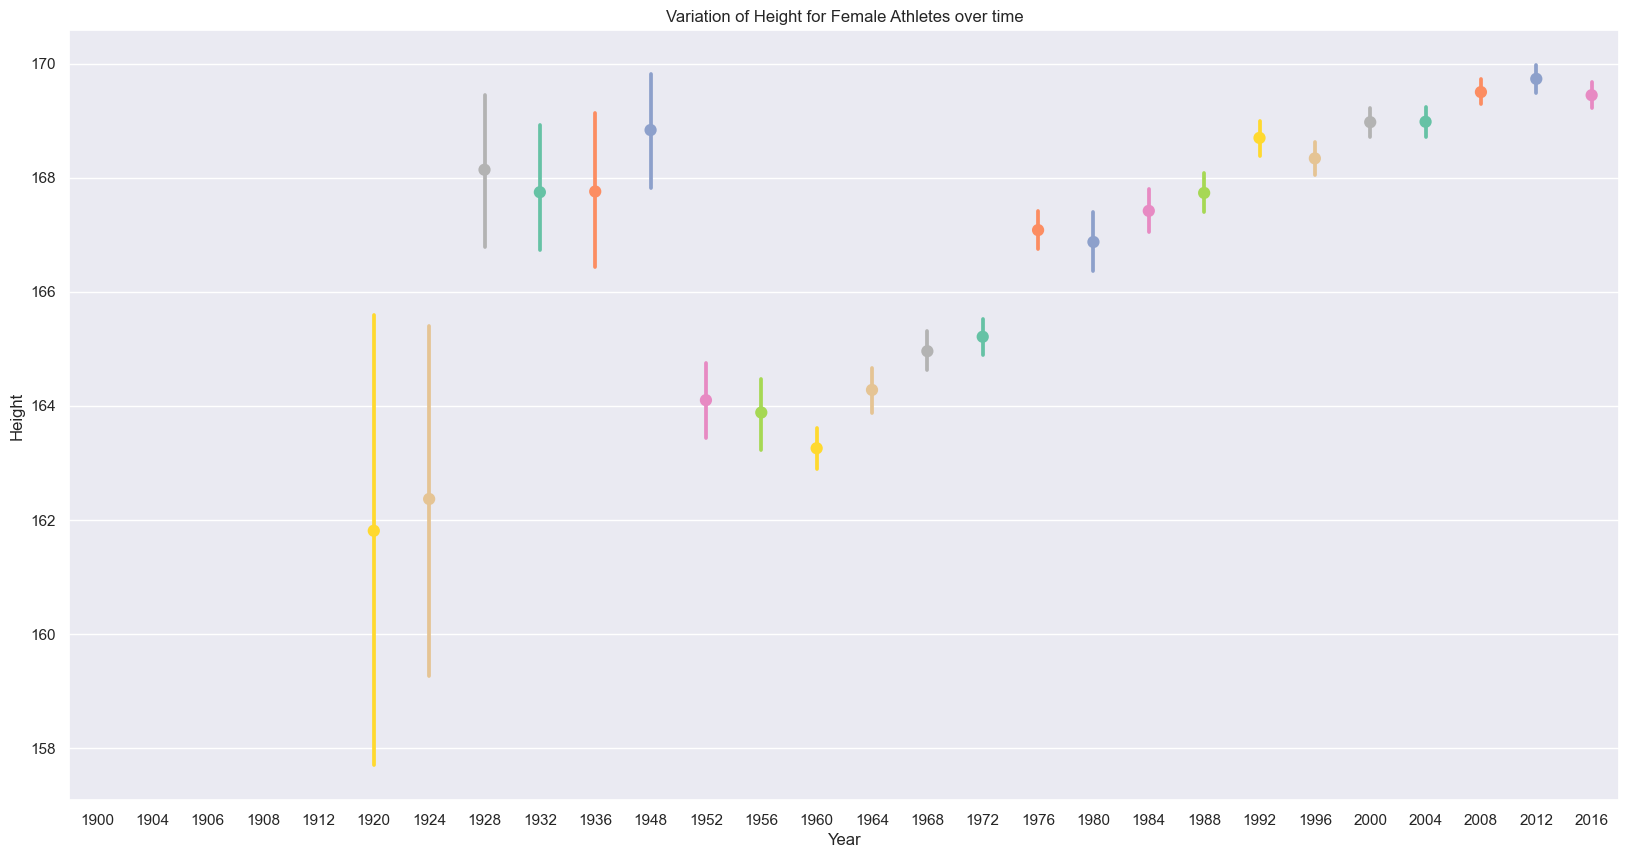

In [52]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year', y = 'Height', data=WomenOverTime, palette='Set2')
plt.title('Variation of Height for Female Athletes over time')

What we may see:

* For both men and women, the height is incrementing over time but it is decreasing between the 2012 and the 2016.
* For women we have a peak between 1928 and 1948, let's deepen this point:

In [53]:
WomenOverTime.loc[(WomenOverTime['Year'] > 1924) & (WomenOverTime['Year'] < 1952)].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
731,419,Majken berg,F,30.0,170.0,60.0,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,Sweden,NaN
1301,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Freestyle,NaN,Hungary,NaN
1302,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Hungary,NaN
1484,825,Lynda Riley Adams (-Hunt),F,16.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Springboard,NaN,Canada,NaN
1485,825,Lynda Riley Adams (-Hunt),F,16.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Platform,NaN,Canada,NaN
1525,845,"Birgitta Ann-Agnes ""Bride"" Adams-Ray",F,21.0,NaN,NaN,Sweden,SWE,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Women's High Jump,NaN,Sweden,NaN
1567,874,"Edith Addams de Habbelinck (-Lutjens, -Taylor,...",F,20.0,NaN,NaN,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN
1568,875,Jenny Marie Beatrice Addams,F,19.0,NaN,NaN,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN


The list is full of NaN values (that is why the data for the period deviates from what expected).

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 8px 30px;overflow:hidden;font-weight:500"> 6.5  Variation of age for Italian athletes   </p>

Let's see the age over time for Italian athletes.

I will start reviewing the dataset MenOverTime to refresh the columns:

In [54]:
MenOverTime.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Let's create a sliced dataframe including only male athletes from Italy

In [55]:
itMenOverTime = MenOverTime.loc[MenOverTime['region'] == 'India']

Let's review the first rows:

In [56]:
itMenOverTime.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
1183,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1184,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1185,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN


Okay, now we can plot the change over time:

Text(0.5, 1.0, 'Variation of Age for Indian Male Athletes over time')

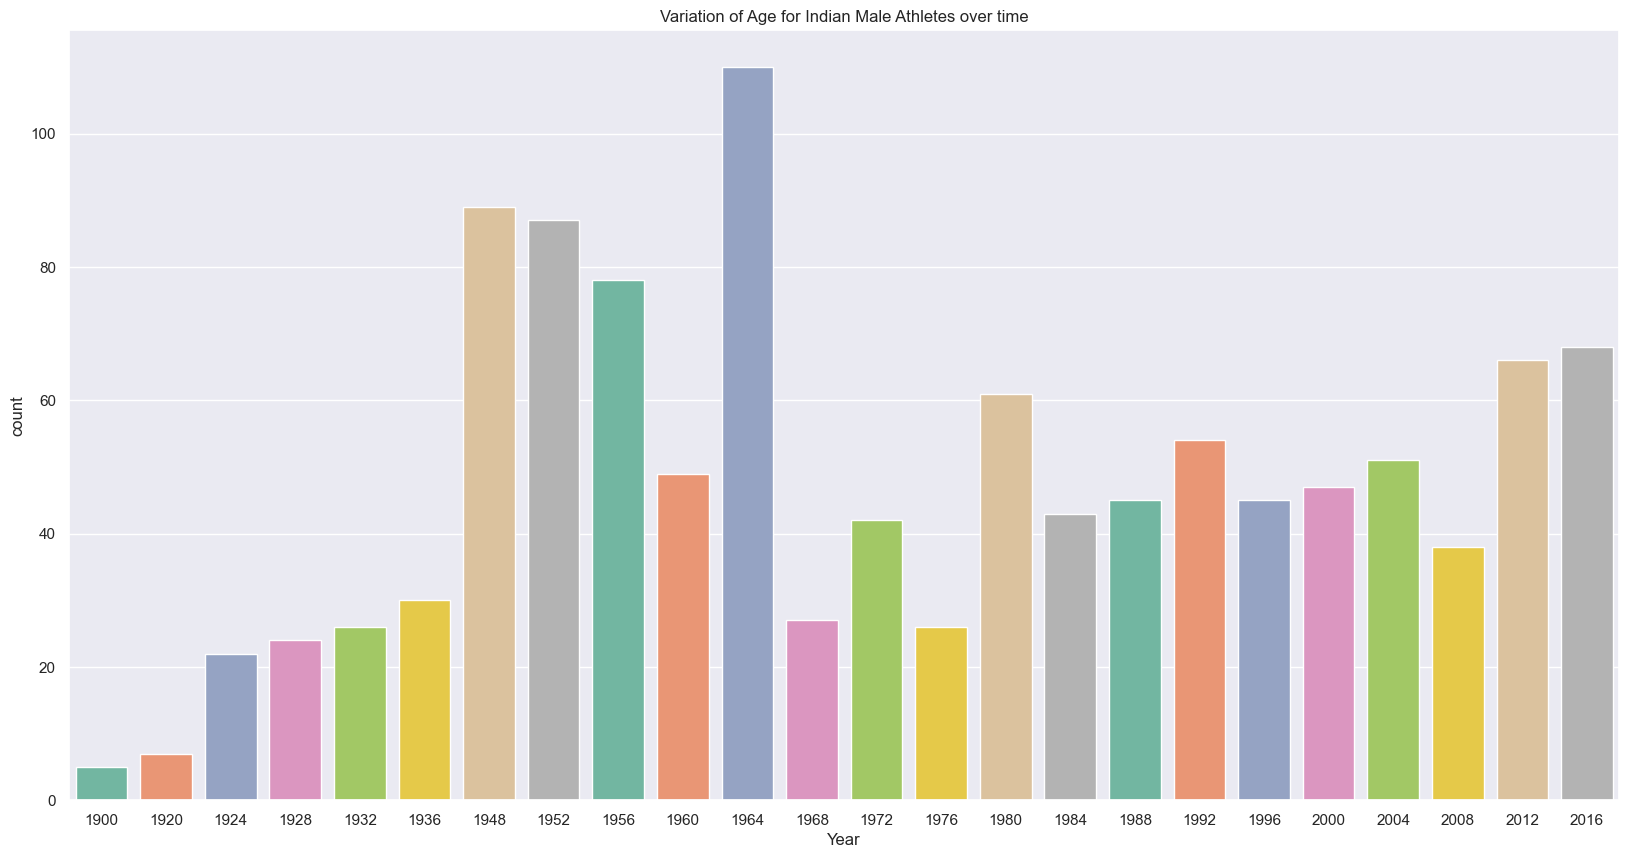

In [57]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itMenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Male Athletes over time')

Okay, we can quickly do the same operation for women:

In [58]:
itWomenOverTime = WomenOverTime.loc[WomenOverTime['region'] == 'India']

Text(0.5, 1.0, 'Variation of Age for Indian Female Athletes over time')

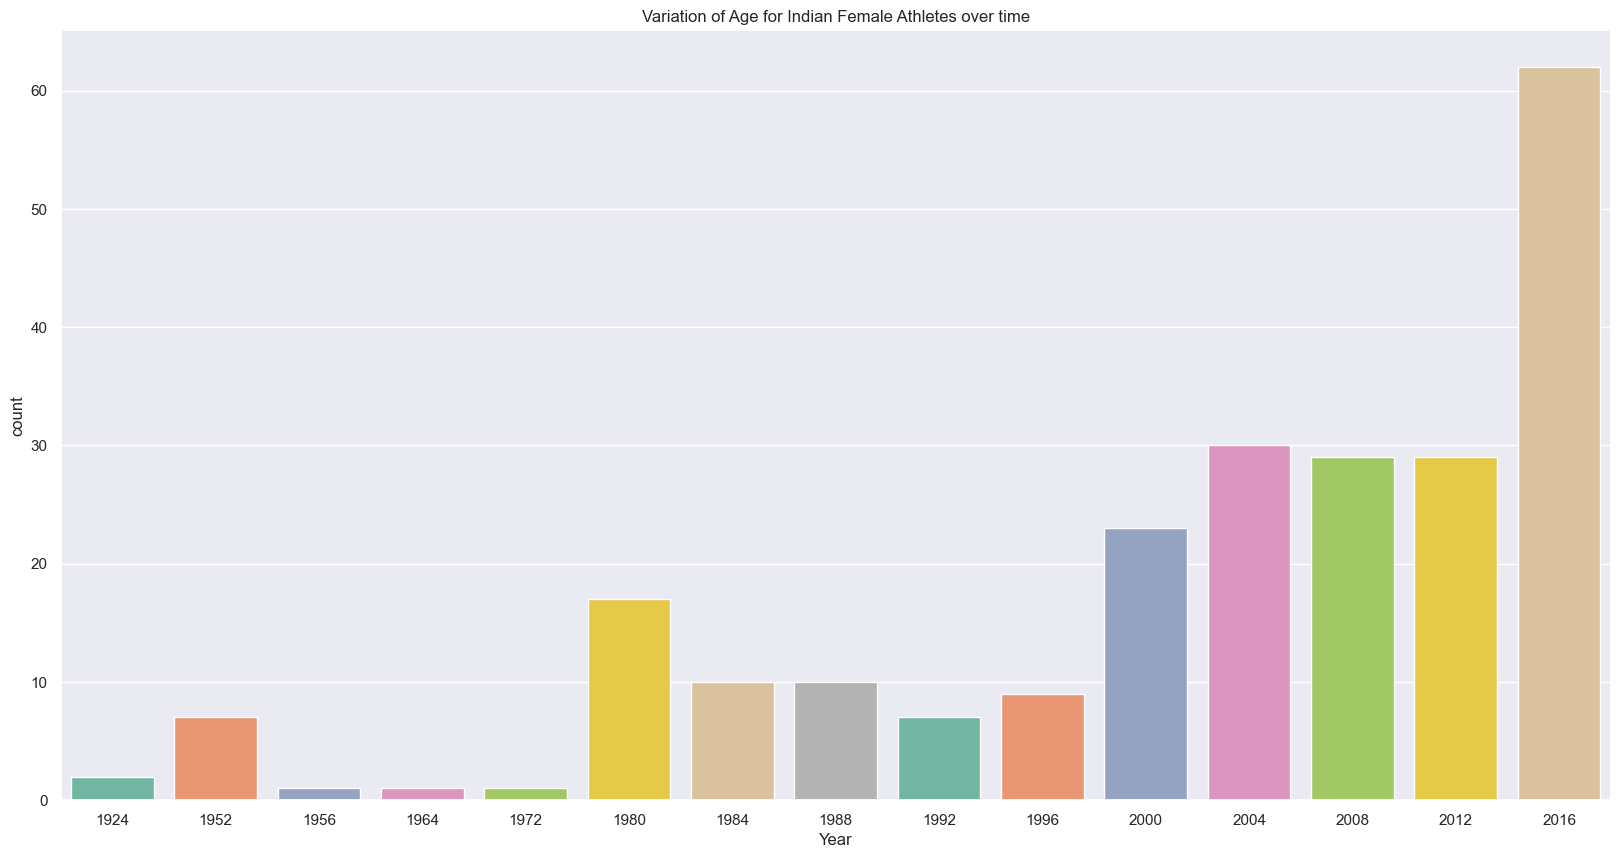

In [59]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itWomenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Female Athletes over time')

***10.6 Variation of height/weight along time for particular disciplines***

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 8px 30px;overflow:hidden;font-weight:500"> 6.6  Variation of height/weight along time for particular disciplines  </p>

**1 Gymnastic**

Let's see the trend of height/weight for Gymnasts, starting from men and then women following the usual approach:

In [60]:
MenOverTime.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Let's first of all isolate all the discipline of the Olympics dataframe.

My idea is to see if Gymnastics is called differently or if there is any typo.

In [61]:
MenOverTime['Sport'].unique().tolist()

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Swimming',
 'Badminton',
 'Gymnastics',
 'Athletics',
 'Art Competitions',
 'Wrestling',
 'Water Polo',
 'Sailing',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Weightlifting',
 'Diving',
 'Canoeing',
 'Handball',
 'Tennis',
 'Modern Pentathlon',
 'Hockey',
 'Volleyball',
 'Baseball',
 'Table Tennis',
 'Archery',
 'Trampolining',
 'Beach Volleyball',
 'Golf',
 'Rugby Sevens',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

Okay, the string to use to filter is 'Gymnastics': let's create two new dataframes for men and women.

In [62]:
gymMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Gymnastics']
gymWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Gymnastics']

Okay: let's now create our plot for male and female athletes and then we can make our observations

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All

Text(0.5, 1.0, 'Weight over year for Male Gymnasts')

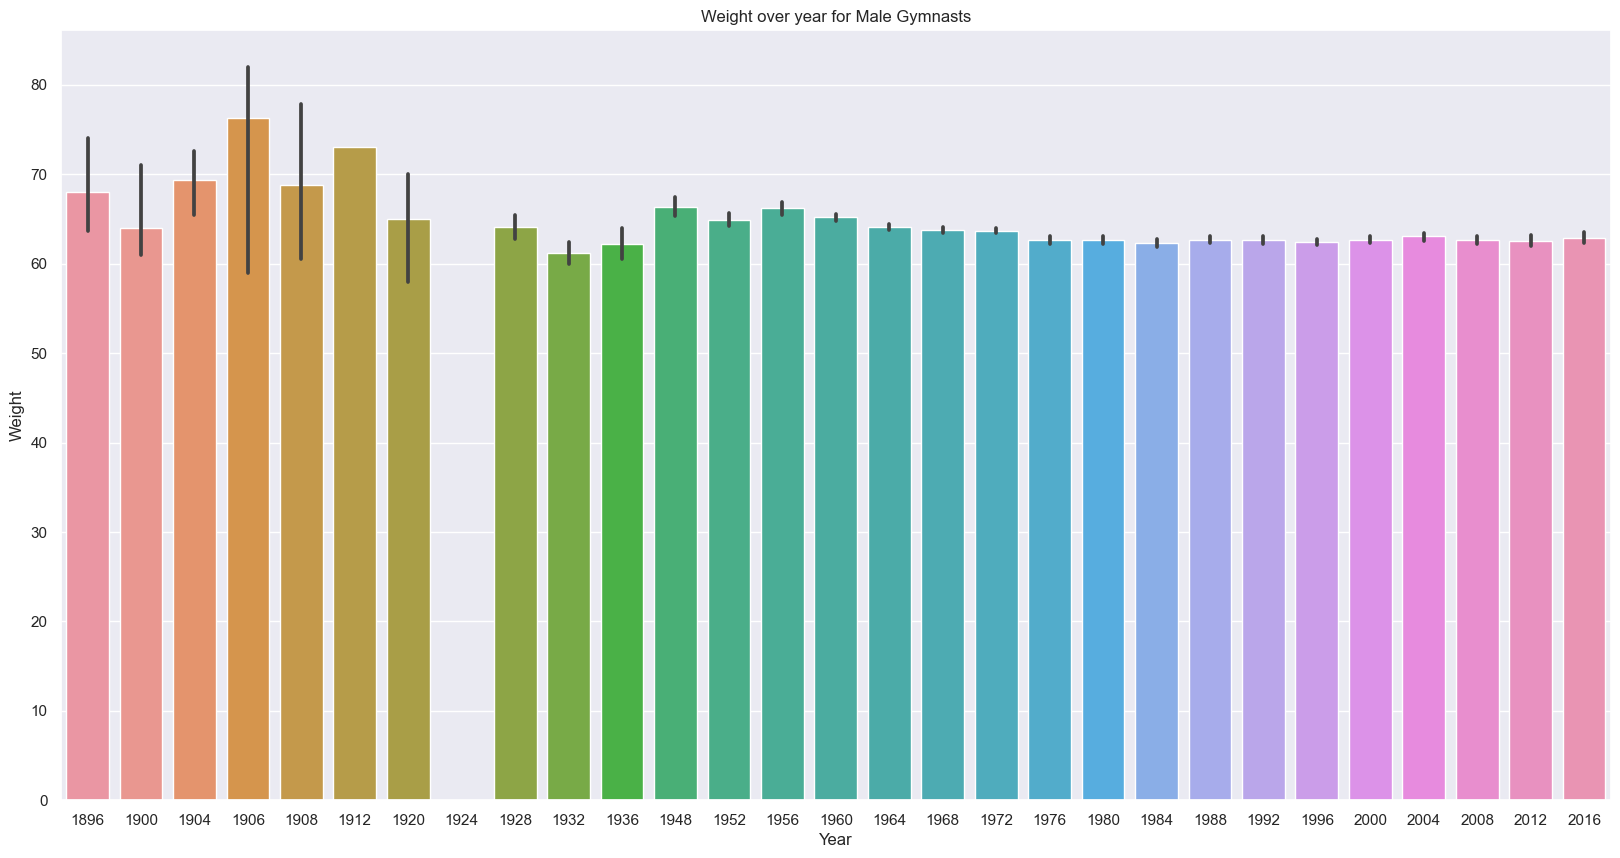

In [63]:
plt.figure(figsize=(20, 10))
sns.barplot(x ='Year', y ='Weight', data=gymMenOverTime)
plt.title('Weight over year for Male Gymnasts')

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Height over year for Male Gymnasts')

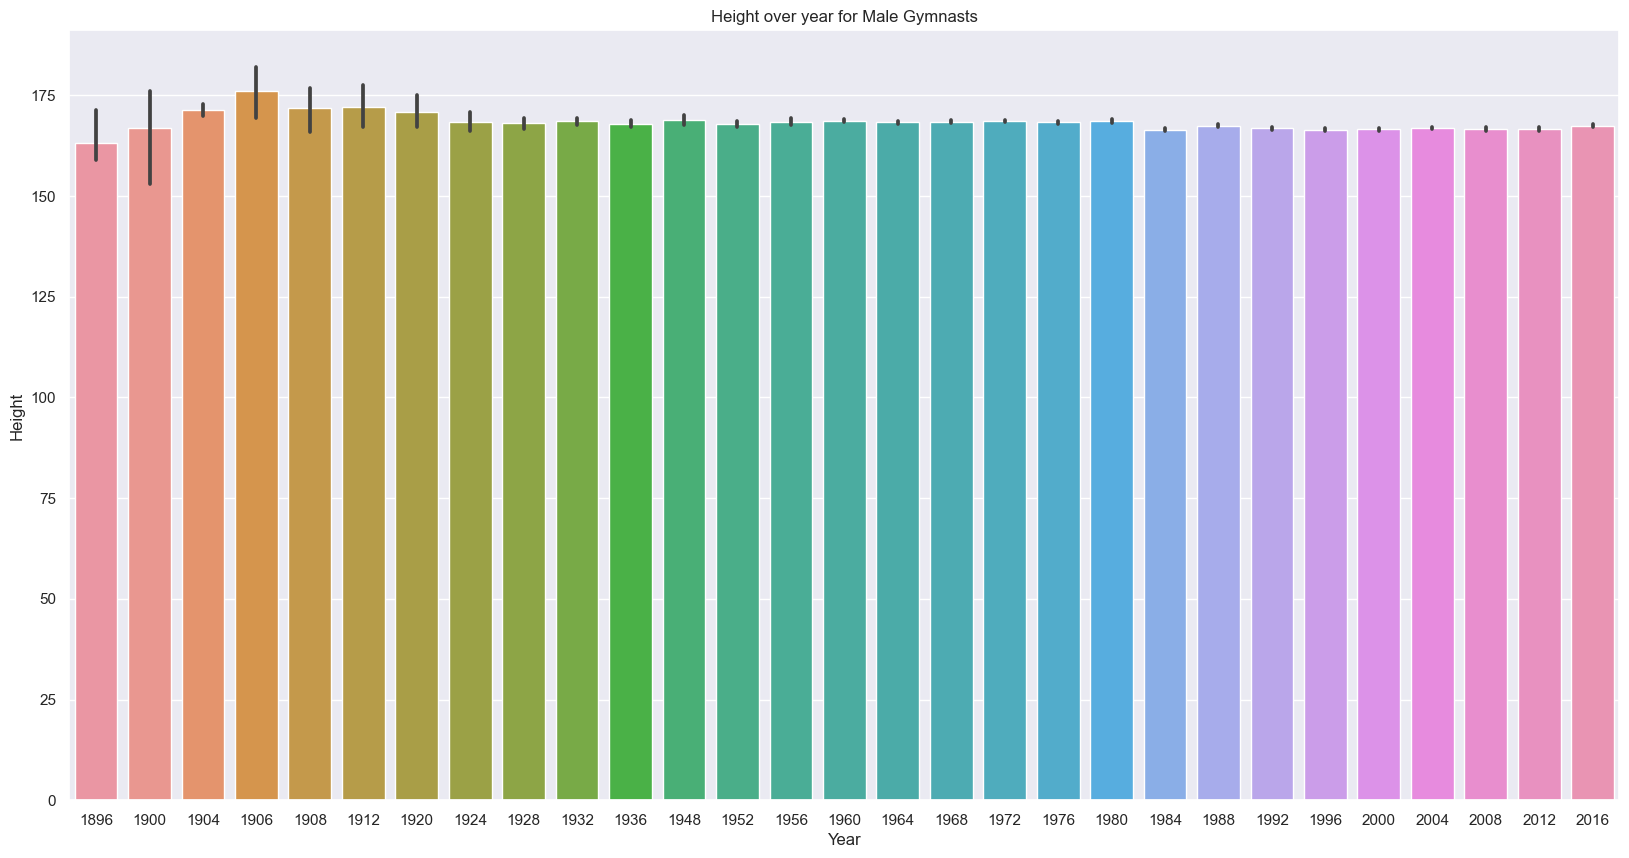

In [64]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Year', y ='Height', data=gymMenOverTime)
plt.title('Height over year for Male Gymnasts')

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Weight over year for Female Gymnasts')

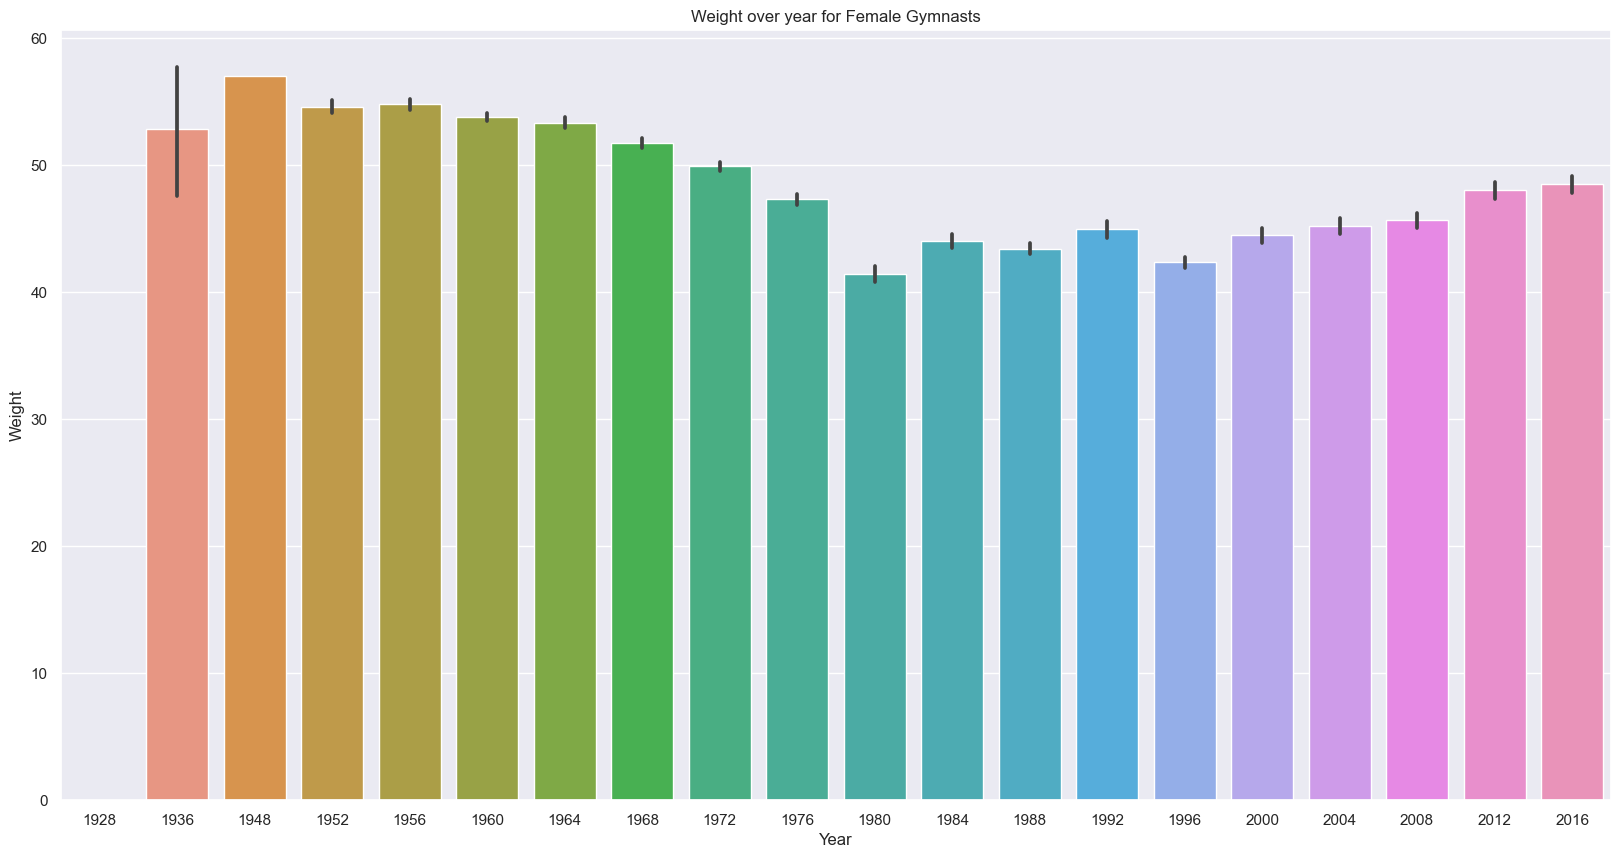

In [65]:
plt.figure(figsize=(20, 10))
sns.barplot(x ='Year', y ='Weight', data=gymWomenOverTime)
plt.title('Weight over year for Female Gymnasts')

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Height over year for Female Gymnasts')

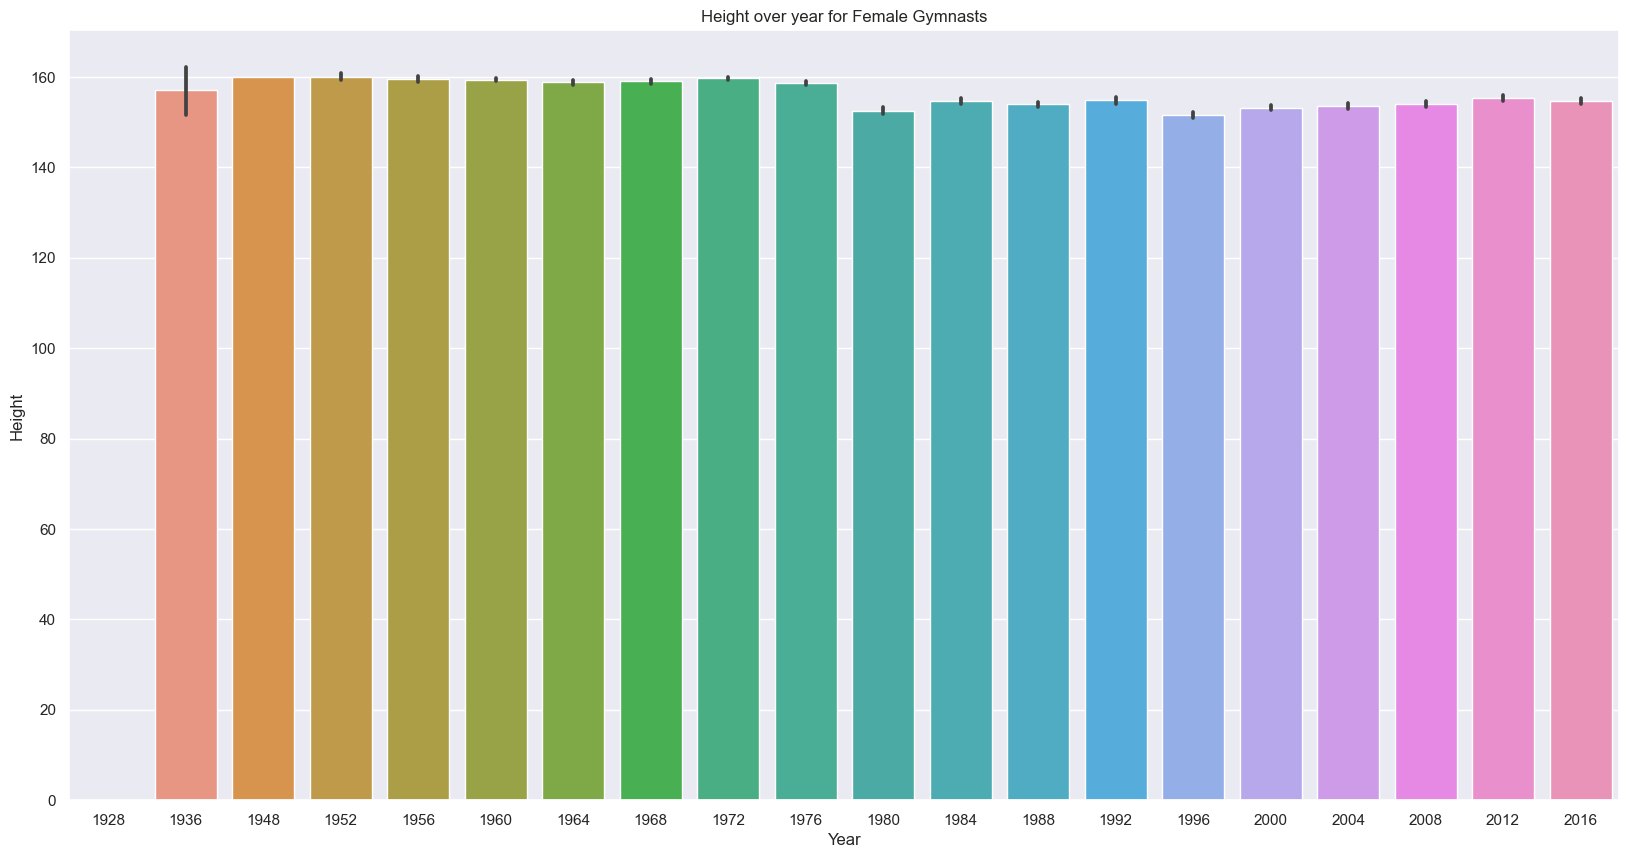

In [66]:
plt.figure(figsize=(20, 10))
sns.barplot(x= 'Year',y = 'Height', data=gymWomenOverTime)
plt.title('Height over year for Female Gymnasts')

A few things I noticed:
* The weight for female Gymnasts has go down for 60 to 50 kilograms on average;
* The weight for men has been more or less stable since 1964;
* The height is more stable for both men and women.

Also, men weight data from 1924 seems missing: let's check.

In [67]:
gymMenOverTime['Weight'].loc[gymMenOverTime['Year'] == 1924].isnull().all()

True

It seems that we do not have any information about the athletes in 1924.

**2 Weightlifting**

Let's work on an analysis similar to what we have done for Gymnastics also for the Lifters.

We can start creating a new, dedicated dataframe.

In [68]:
wlMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Weightlifting']
wlWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Weightlifting']

Okay: let's now create our plot for male and female athletes and then we can make our observations

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Weight over year for Male Lifters')

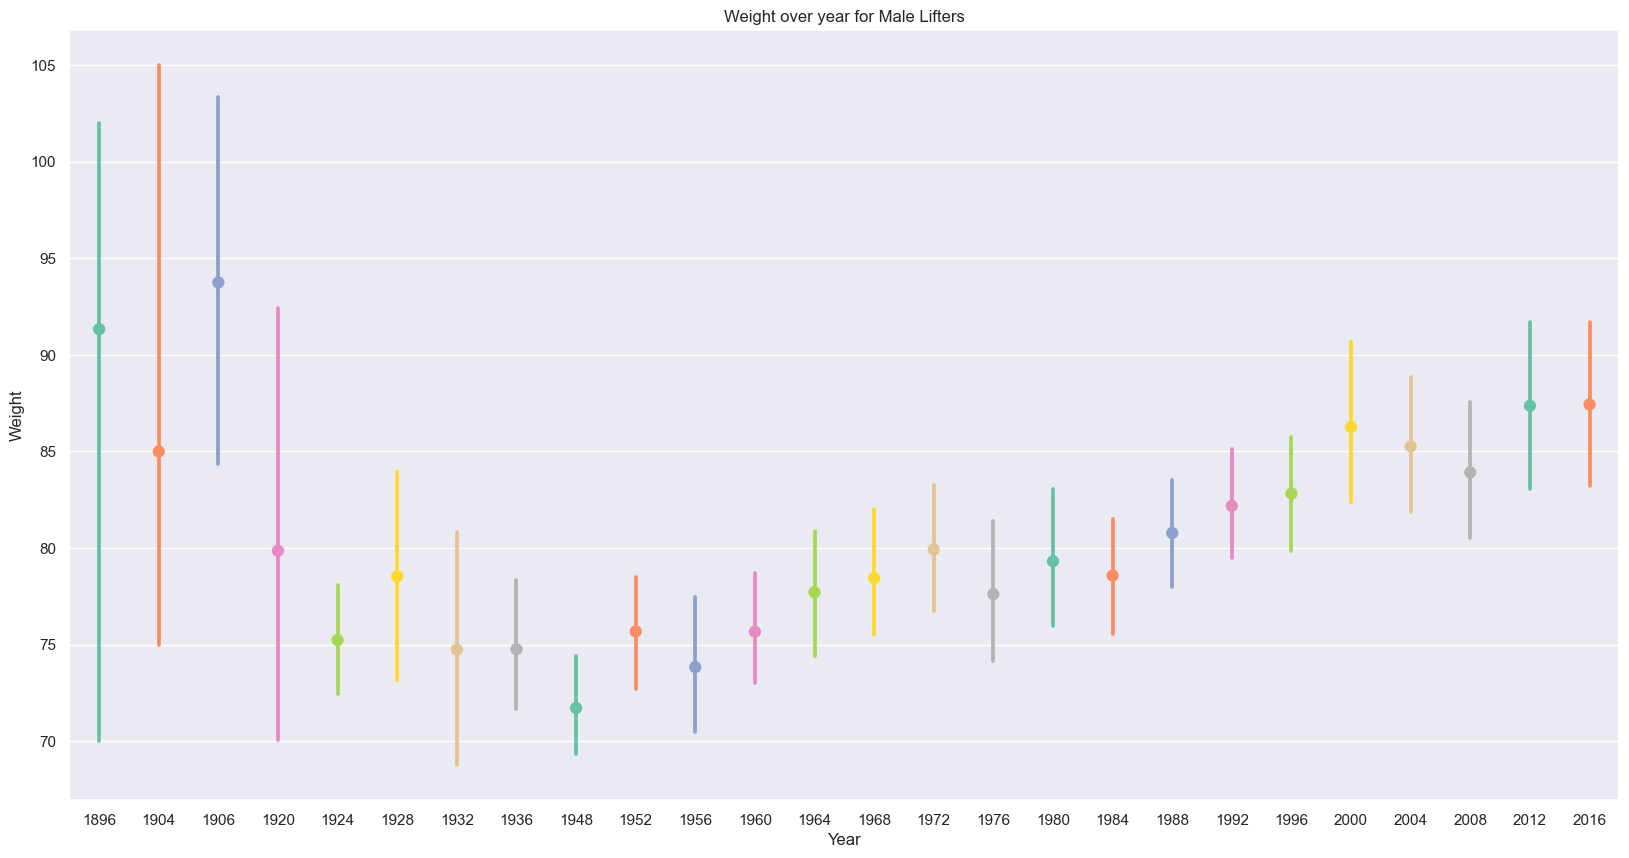

In [69]:
plt.figure(figsize=(20, 10))
sns.pointplot(x ='Year', y ='Weight', data=wlMenOverTime, palette='Set2')
plt.title('Weight over year for Male Lifters')

C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\91797\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Height over year for Male Lifters')

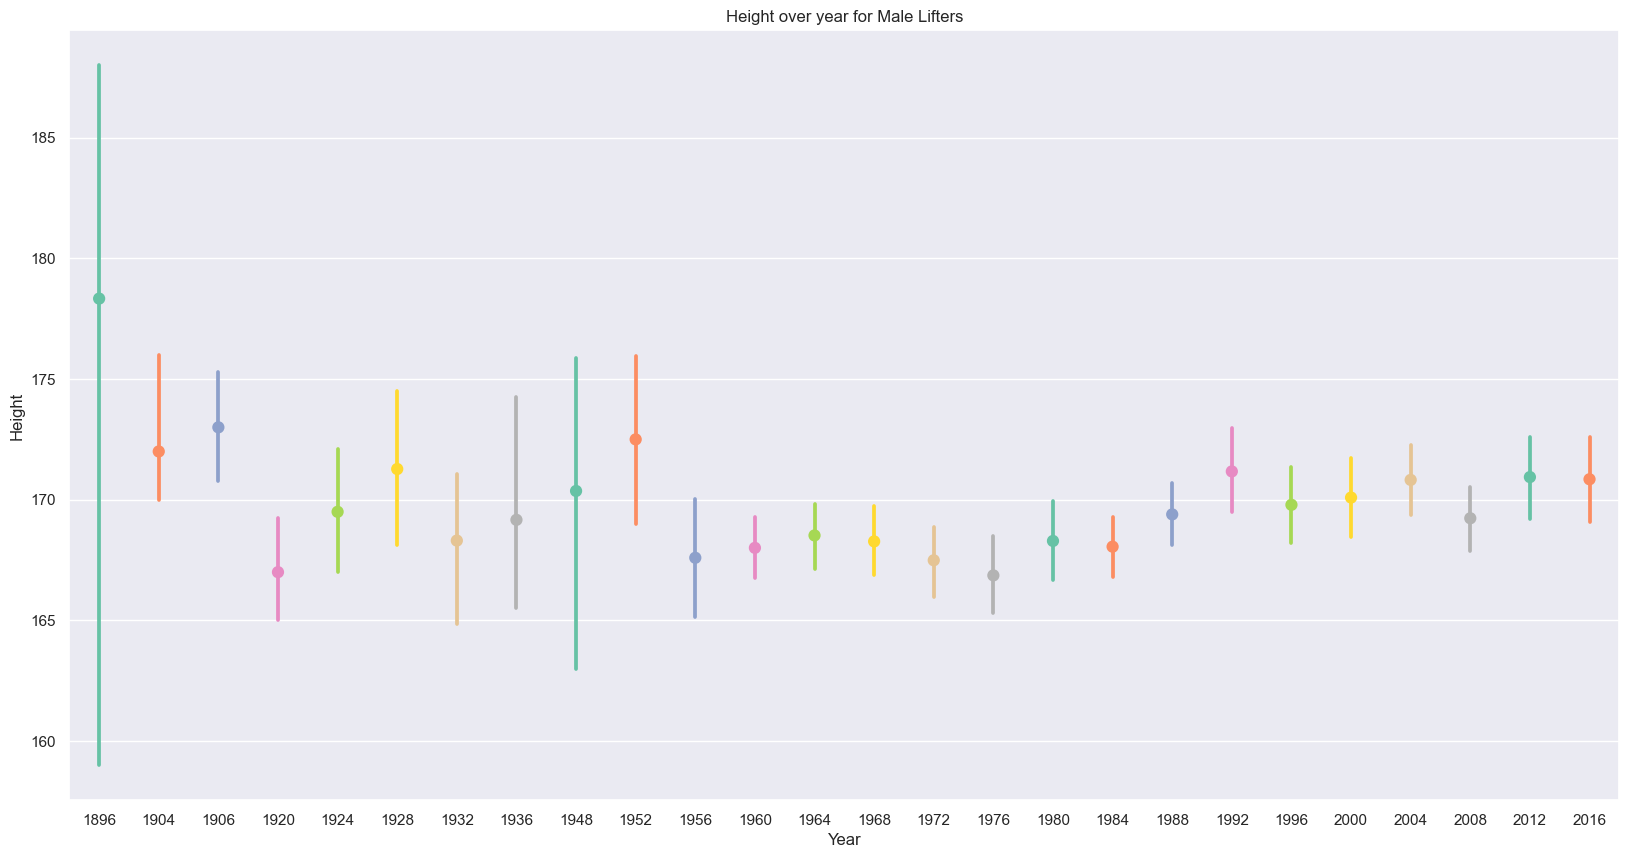

In [71]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year', y = 'Height', data=wlMenOverTime, palette='Set2')
plt.title('Height over year for Male Lifters')

Text(0.5, 1.0, 'Weight over year for Female Lifters')

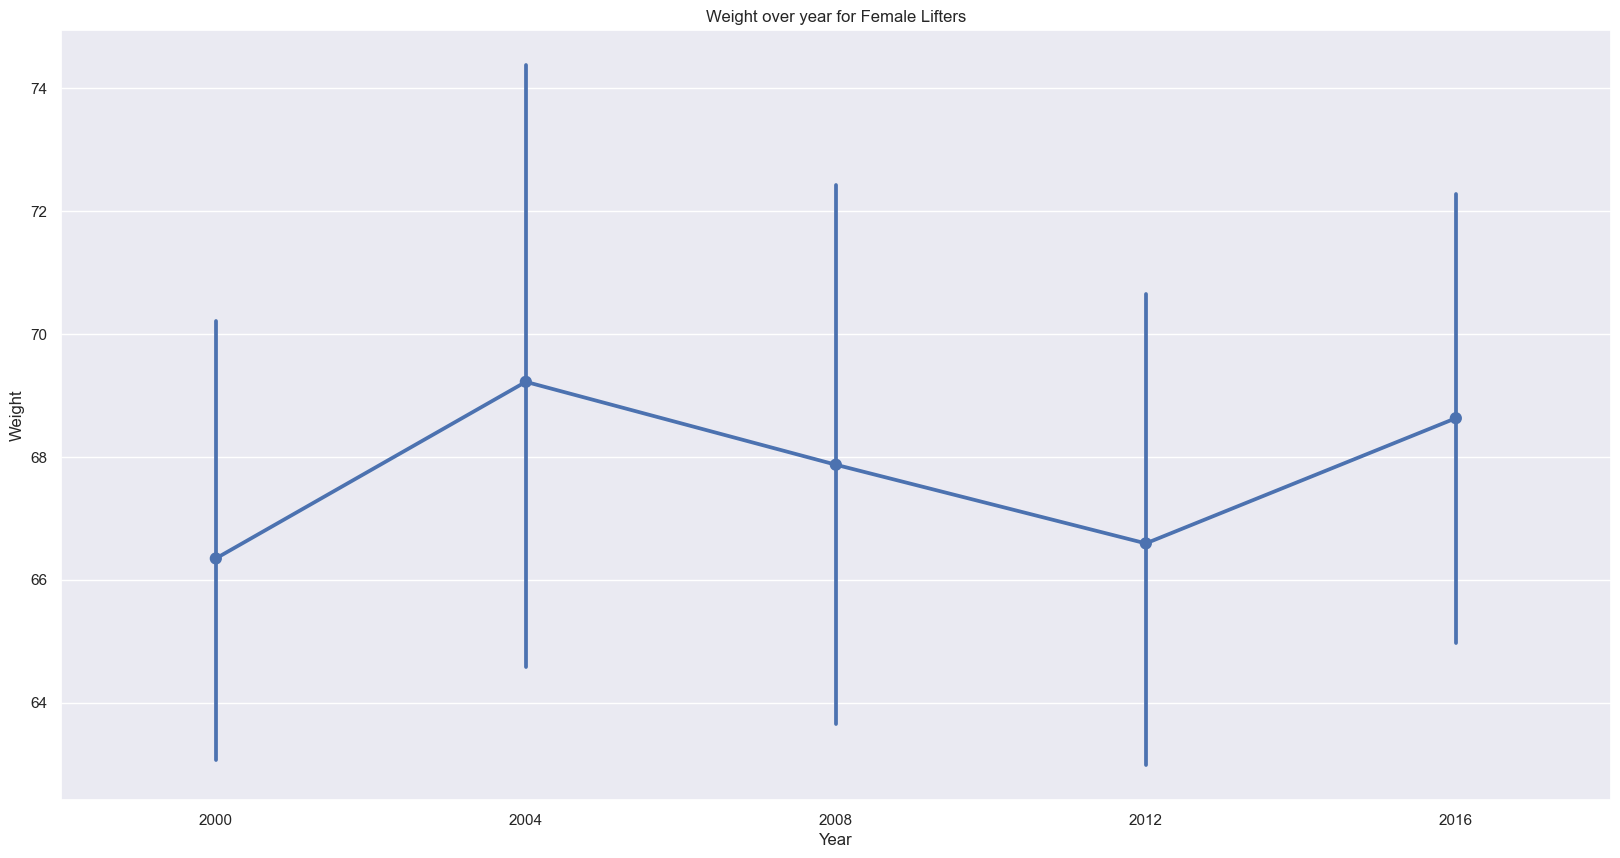

In [72]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year', y ='Weight', data=wlWomenOverTime)
plt.title('Weight over year for Female Lifters')

Text(0.5, 1.0, 'Height over year for Female Lifters')

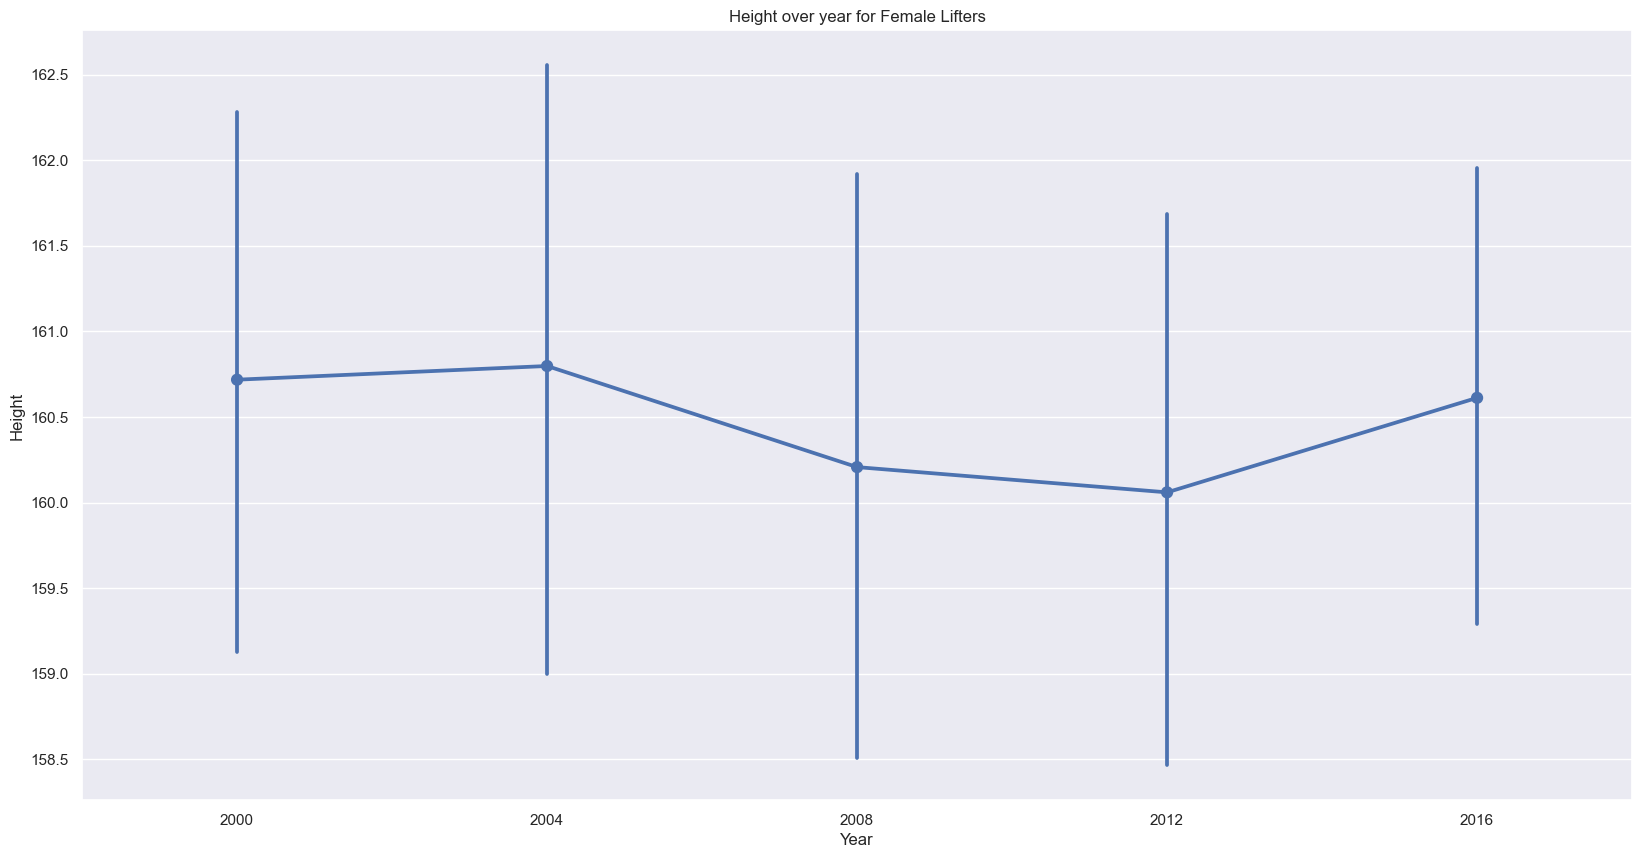

In [73]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year', y = 'Height', data=wlWomenOverTime)
plt.title('Height over year for Female Lifters')

It seems that we do not have data for female athletes before the 2000 Games.

Let's check this point.

In [74]:
wlWomenOverTime['Weight'].loc[wlWomenOverTime['Year'] < 2000].isnull().all()

True

Our observation seems correct.

# THE END